In [1]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
group_info = pd.read_csv('group_info.csv')

In [4]:
group_info.head(5)

,work_id,author_position,author_id,institution_id,publication_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,first_pub_year,last_pub_year,career_len,mentor_first_pub_year,mentor_scientific_age
0,W3106330698,last,A2992032169,I102197404,2001,0,1,A2620033670,2001,1.0,2001,2002,1,2001,0
1,W3106330698,last,A2992032169,I102197404,2001,0,1,A2620033670,2002,1.0,2001,2002,1,2001,1
2,W2017298868,last,A2992032169,I102197404,2002,1,1,A2620033670,2002,1.0,2001,2002,1,2001,1
3,W3106330698,last,A2992032169,I102197404,2001,0,1,A2620033670,2003,1.0,2001,2002,1,2001,2
4,W2017298868,last,A2992032169,I102197404,2002,1,1,A2620033670,2003,1.0,2001,2002,1,2001,2


In [5]:
max(group_info.current_year)

2023

In [6]:
print(len(group_info))

8224257


##### current_year is the important iterative variable

#### Case Study

In [30]:
current_year = 2000
completeness = 0.8

# group_info_2000 = group_info[group_info.current_year==current_year]

group_info_2000 = group_info[['author_id','group_size','career_len','mentor_id']][(group_info.current_year==current_year)
                            &(group_info.ratio_institution>=completeness)].drop_duplicates()   # limitation : the completeness of institution information
print(len(group_info_2000))

58762


In [31]:
group_info_2000.head(5)

,author_id,group_size,career_len,mentor_id
236,A2102791458,9,24,A2620220593
237,A2044233755,9,26,A2620220593
238,A2142090473,9,8,A2620220593
239,A2096733727,9,5,A2620220593
244,A2585269514,9,0,A2620220593


In [32]:
mentor = list(group_info_2000.mentor_id.drop_duplicates())
print('num of mentor : ',len(mentor))

mentee = list(group_info_2000.author_id.drop_duplicates())
print('num of mentee : ',len(mentee))

num of mentor :  6102
num of mentee :  49419


##### examine whether a mentee has more than one mentor

In [33]:
temp = group_info_2000.groupby('author_id')['author_id'].agg('count').reset_index(name='count')

In [34]:
# temp.head(5)

In [35]:
temp = temp[temp['count']>1]

In [36]:
# temp.sample(5)

In [37]:
author_multi_group = list(temp.author_id)

In [38]:
group_info_2000_multi_group = group_info_2000[group_info_2000.author_id.isin(author_multi_group)]

In [39]:
group_info_2000_multi_group.head(5)

,author_id,group_size,career_len,mentor_id
979,A2467232034,13,28,A2624513062
980,A2421386536,13,28,A2624513062
981,A2159000815,13,3,A2624513062
988,A2111999924,13,3,A2624513062
992,A2723691872,13,25,A2624513062


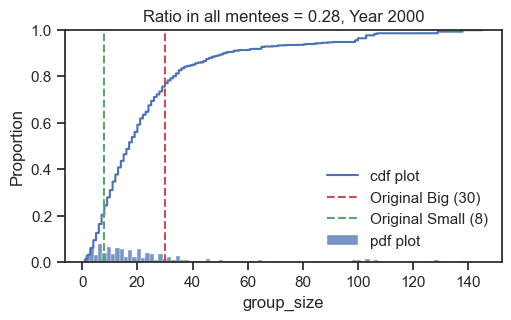

In [40]:
# display preset
sns.set(style='ticks', font_scale=1.0, font='Arial')

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
sns.histplot(data=group_info_2000_multi_group, x="group_size",stat='proportion', #cumulative=1,
             ax=ax,label='pdf plot')

sns.ecdfplot(data=group_info_2000_multi_group, x="group_size",stat='proportion',complementary=0,
             ax=ax,label='cdf plot')

Q75 = np.quantile(group_info_2000['group_size'],0.75)
Q25 = np.quantile(group_info_2000['group_size'],0.25)

ax.axvline(x=Q75,ls='--',color='r',label=f'Original Big ({int(Q75)})')
ax.axvline(x=Q25,ls='--',color='g',label=f'Original Small ({int(Q25)})')
# ax.annotate(f'Original Big ({int(Q75)})', xy=(Q75, 0.90), xytext=(Q75, 0.90),
#             arrowprops=dict(facecolor='r', shrink=0.05,edgecolor='r'),fontsize=10)

# ax.annotate(f'Original Small ({int(Q25)})', xy=(Q25, 0.70), xytext=(Q25, 0.70),
#             arrowprops=dict(facecolor='g', shrink=0.05,edgecolor='g'),fontsize=10)
ratio = round(len(group_info_2000_multi_group)/len(group_info_2000),2)
ax.set(title = f'Ratio in all mentees = {ratio}, Year {current_year}')
plt.legend(frameon=0)
fig.savefig(f'figs/multipul group/{current_year}.pdf')

#### Institution completeness

In [5]:
all_auship = pd.read_csv('work_authorship.csv')

In [6]:
all_auship.head(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,last_pub_year,career_len,scientific_age
0,W1000433918,first,A2236851489,I1322918889,1990,1953,1991,38,37
1,W1000433918,middle,A2443213595,I2613432,1990,1986,2020,34,4
2,W1000433918,middle,A2301774941,I1322918889,1990,1981,2022,41,9
3,W1000433918,middle,A2202964799,I204465549,1990,1970,2020,50,20
4,W1000433918,last,A2264557872,I204465549,1990,1990,1990,0,0


In [7]:
len(all_auship)

583883

In [4]:
work_set = set(all_auship.work_id)
print(len(work_set))

2730484


In [5]:
def get_notnull(x):
    temp = x[~x['institution_id'].isnull()]
    return len(temp)/len(x)

In [6]:
data = all_auship.groupby('work_id').apply(get_notnull).reset_index(name='ratio_inst.')

In [7]:
data.head(5)

,work_id,ratio_inst.
0,W100000002,1.0
1,W1000000589,0.0
2,W1000002739,1.0
3,W1000011982,1.0
4,W100002459,0.5


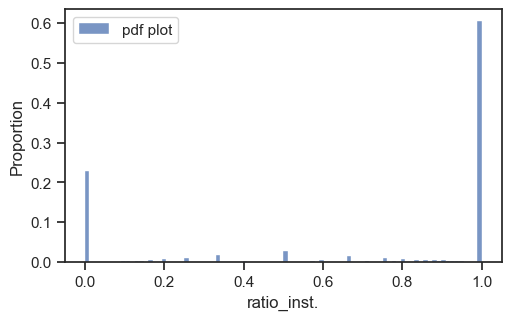

In [8]:
sns.set(style='ticks', font_scale=1.0, font='Arial')

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
sns.histplot(data=data, x="ratio_inst.",stat='proportion', #cumulative=1,
             ax=ax,label='pdf plot')
# sns.ecdfplot(data=data, x="ratio_inst.",stat='proportion',complementary=0,
#              ax=ax,label='cdf plot')
plt.legend()

In [10]:
data1 = data

In [11]:
len(data1[data1['ratio_inst.']<0.2])/(len(data1))

0.2450246915931388

In [12]:
data2 = data1[data1['ratio_inst.']>0.0]

<Axes: xlabel='ratio_inst.', ylabel='Proportion'>

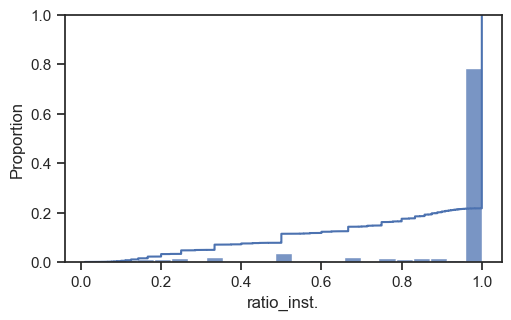

In [13]:
sns.set(style='ticks', font_scale=1.0, font='Arial')

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
sns.histplot(data=data2, x="ratio_inst.",stat='proportion', #cumulative=1,
             ax=ax,label='pdf plot')
sns.ecdfplot(data=data2, x="ratio_inst.",stat='proportion',complementary=0,
             ax=ax,label='cdf plot')

In [14]:
data1.to_csv('inst_completeness.csv',index=0)